# Entangled Qubits

In this notebook we want to discuss how one can create a pair of entangled qubits.

Remember that the $z$ basis of a single qubit is defined by,

$$
\begin{align}
\vert0\rangle=\begin{pmatrix}1 \\ 0\end{pmatrix}, &&
\vert1\rangle=\begin{pmatrix}0 \\ 1\end{pmatrix},
\end{align}
$$

and that the $x$ basis is,

$$
\begin{align}
\vert+\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 1\end{pmatrix}, &&
\vert-\rangle=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ -1\end{pmatrix}.
\end{align}
$$

The basis of the composite system of two qubits is,

$$
\begin{align}
\vert00\rangle&=\vert0\rangle\otimes\vert0\rangle=\begin{pmatrix}1 \\ 0 \\ 0 \\ 0\end{pmatrix},\\
\vert01\rangle&=\vert0\rangle\otimes\vert1\rangle=\begin{pmatrix}0 \\ 1 \\ 0 \\ 0\end{pmatrix},\\
\vert10\rangle&=\vert1\rangle\otimes\vert0\rangle=\begin{pmatrix}0 \\ 0 \\ 1 \\ 0\end{pmatrix},\\
\vert11\rangle&=\vert1\rangle\otimes\vert1\rangle=\begin{pmatrix}0 \\ 0 \\ 0 \\ 1\end{pmatrix}.\\
\end{align}
$$

One way to create an entangled state is to apply the Hadamard gate $H$ on one of the qubits followed by a CNOT (controlled-not) $C_X$. Both gates are given below,

$$
\begin{align}
H=\frac{1}{\sqrt{2}}\begin{pmatrix}1 & 1\\ 1 & -1\end{pmatrix}, &&
C_X=\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{pmatrix}.
\end{align}
$$

We now entangle two qubits initially in the $\vert0\rangle$ state,

$$
\begin{align}
C_XH_1\vert00\rangle
&=C_X(H\otimes1)(\vert0\rangle\otimes\vert0\rangle)\\
&=C_X(H\vert0\rangle\otimes 1\vert0\rangle)\\
&=C_X(\vert+\rangle\otimes \vert0\rangle)\\
&=C_X\left(\frac{\vert0\rangle+\vert1\rangle}{\sqrt{2}}\otimes\vert0\rangle\right)\\
&=C_X\frac{\vert00\rangle+\vert10\rangle}{\sqrt{2}}
\end{align}.
$$

The CNOT gate $C_X$ inverts the second qubit (with respect to the $z$ eigenbasis) if the first qubit is in the $\vert1\rangle$ state,

$$
C_X\frac{\vert00\rangle+\vert10\rangle}{\sqrt{2}}
=\frac{\vert00\rangle+\vert11\rangle}{\sqrt{2}}
=\frac{1}{\sqrt{2}}\begin{pmatrix}1\\ 0\\ 0\\ 1\end{pmatrix}
.
$$

Now, we perform the same steps but in matrix notation,

$$
C_X(1\otimes H)\vert00\rangle
=
\frac{1}{\sqrt{2}}
\begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{pmatrix}
\begin{pmatrix}1 & 0 & 1 & 0\\ 0 & 1 & 0 & 1\\ 1 & 0 & -1 & 0\\ 0 & 1 & 0 & -1\end{pmatrix}
\begin{pmatrix}1 \\ 0 \\ 0\\ 0\end{pmatrix}
=\frac{1}{\sqrt{2}}\begin{pmatrix}1 \\ 0 \\ 0\\ 1\end{pmatrix}.
$$

In [3]:
import numpy as np
import qiskit as qk

backend = qk.BasicAer.get_backend("statevector_simulator")

from qiskit.tools.visualization import plot_state_city

def entangled_qubits():
    qr = qk.QuantumRegister(2)
    qc = qk.QuantumCircuit(qr)
    qc.h(qr[0])
    qc.cx(qr[0], qr[1])
    
    return qk.execute(qc, backend).result().get_statevector()

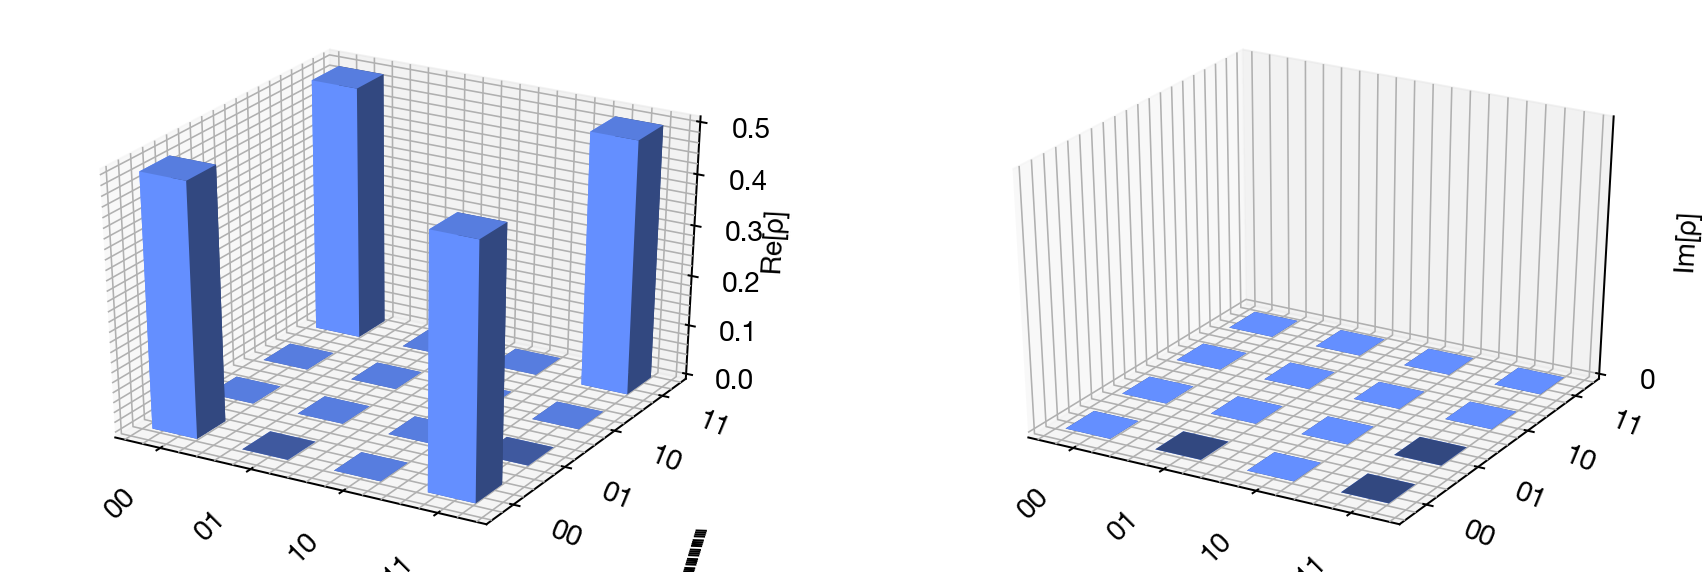

In [4]:
plot_state_city(entangled_qubits())

In the above plot we get a visualization of the density matrix,

$$
\hat{\rho}
=\frac{\vert00\rangle+\vert11\rangle}{\sqrt{2}}\frac{\langle00\vert+\langle11\vert}{\sqrt{2}}
=\frac{\vert00\rangle\langle00\vert+\vert11\rangle\langle00\vert+\vert11\rangle\langle00\vert+\vert11\rangle\langle11\vert}{2},
$$

in matrix form,
$$
\hat{\rho}
=
\frac{1}{2}
\begin{pmatrix}
1 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
1 & 0 & 0 & 1
\end{pmatrix}.
$$

A pure, i.e. not entangled, state is a state for which the density matrix can be written as,

$$
\hat{\rho}=\vert\phi\rangle\langle\phi\vert.
$$

Mathematically this means that the density matrix of a pure state has rank 1 while the density matrix of a mixed (entangled) state has rank greater than 1. 

For a density matrix of a pure state we find $\text{tr}\hat{\rho}^2=1$. For the density matrix of our entangled (Bell) state we find,

$$
\text{tr}\hat{\rho}^2=\frac{1}{2}\neq1,
$$

thus we indeed have created an entangled state.